## PHYS-F-303 : Physique statisque, partie numérique

Aurélien Manera
Florian Danneau


Le but du travail était de répondre aux challenges proposés dans les 4 parties du MOOC n°6 "MonteCarlo"

# 6.1 


Il n'y avait aucune question.

# 6.2

# 1ère question : Python a beaucoup de générateurs de nombres aléatoires intégrés. Consultez la documentation et essayez-en quelques uns. En particulier, comparez la sortie des générateurs exponentiels et gaussiens intégrés avec les versions implémentées dans le mooc.

# De plus, Une autre méthode populaire pour générer des nombres selon la distribution gaussienne est connue sous le nom de Box-Muller. Recherchez sa définition sur le web, essayez de l'implémenter et vérifiez que cela fonctionne comme prévu.

In [1]:
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']= 16

Exemples de fonctions :

La commande numpy.random.seed est une commande qui fixe une place de départ dans la séquence des nombres pseudo-aléatoires. Les flotteurs retournés sont toujours identiques pour cette même graine.

In [2]:
numpy.random.seed(0)

x = numpy.random.random_sample(2)
print(x)

[ 0.5488135   0.71518937]


Distribution uniforme dans un intervalle [a,b]

In [3]:
a = 5
b = 20
x = numpy.random.random_sample(10)
y = (b-a)*x+a
print(y)

[ 14.04145064  13.17324774  11.35482199  14.6884117   11.56380817
  18.37659501  19.45494141  10.75162278  16.87587557  12.9334238 ]


Méthode pour générer des nombres aléatoires par la méthode de Box-Muller :

La transformée de Box-Muller est une méthode pour générer des nombres aléatoires normalement distribués à partir de nombres aléatoires uniformément distribués. La transformation de Box-Muller peut être résumée comme suit, supposons que $u_1$ et $u_2$ sont des variables aléatoires indépendantes qui sont uniformément réparties entre 0 et 1 et soit:

\begin{equation}
z_{1} = \sqrt{-2\log(u_{1})} \cos({2 \pi u_{2}})
\end{equation}

\begin{equation}
z_{2} = \sqrt{-2\log(u_{1})} \sin({2 \pi u_{2}})
\end{equation}

Où $z_{1}$ et $z_{2}$ sont des variables aléatoires indépendantes avec une distribution normale standard. Intuitivement, la transformation associe chaque cercle de points autour de l'origine à un autre cercle de points autour de l'origine où les plus grands cercles externes sont associés à des cercles intérieurs rapprochés et des cercles internes à des cercles externes.

Implémentation de la méthode de Box-Muller :

In [4]:
u1 = numpy.random.random_sample(10000)
u2 = numpy.random.random_sample(10000)

def generate_normal(u1,u2): 
    z1 = numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*numpy.pi*u2)
    z2 = numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*numpy.pi*u2)
    
    
    return z1,z2

In [5]:
z1 = generate_normal(u1,u2)
z2 = generate_normal(u1,u2)

In [6]:
print(z1)

(array([ 0.14142497,  0.30064416,  2.18106502, ...,  0.59577976,
        0.44207976, -1.26426915]), array([-1.05409193,  0.25346905, -0.72944549, ...,  0.27098582,
       -0.70819927, -3.36639909]))


In [7]:
print(z2)

(array([ 0.14142497,  0.30064416,  2.18106502, ...,  0.59577976,
        0.44207976, -1.26426915]), array([-1.05409193,  0.25346905, -0.72944549, ...,  0.27098582,
       -0.70819927, -3.36639909]))


C:\Users\Florian\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


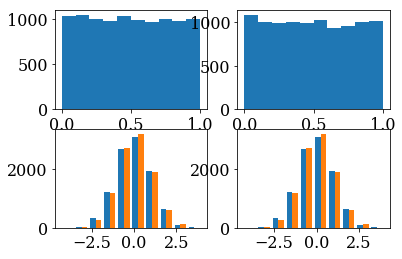

In [8]:
fig = plt.figure()
plt.subplot(221) 
pyplot.hist(u1)     
plt.subplot(222)
pyplot.hist(u2)
plt.subplot(223) 
pyplot.hist(z1)     
plt.subplot(224)
pyplot.hist(z2)
fig.show()

Dans la première ligne du graphique, nous pouvons voir les histogrammes de $u_{1}$ et $u_{2}$ avant la transformation et dans la deuxième ligne, nous pouvons voir les valeurs après la transformation, respectivement $z_{1}$  et $z_{2}$.

Nous pouvons observer que les valeurs avant la transformation sont réparties uniformément tandis que les histogrammes des valeurs après la transformation ont la forme gaussienne typique.

# 2ème question : Inverser la fonction de partition.

$\underline{Lemme}$: Soit $F$ une fonction de répartition sur $\mathbb{R}$, et $U$ une variable de loi $\mathcal{U}$([0,1]).
La variable $F^{-1}(U)$ admet $F$ pour fonction de répartition.

La méthode d'inversion demande la connaissance de la fonction $F^{-1}$. Elle permet de générer très facilement des lois exponentielles.
Si on n'a pas la connaissance explicite de $F^{-1}$, on peut essayer de l'approcher; par exemple pour une distribution gaussienne. 

Implémentation de l'algorithme de l'inversion de $F$ pour une distribution exponentielle

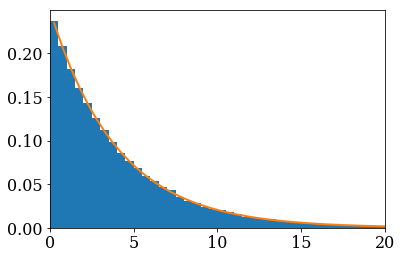

In [9]:
alpha = 0.25
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

binwidth = 0.5
pyplot.xlim(0,20)
bins = numpy.arange(0.,21., binwidth)
pyplot.hist(y, bins, normed=True)

xc = bins[:-1] +binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Méthode du rejet :
    
Dans cette méthode, on génère un ensemble de nombres aléatoires avec une distribution donnée $p_{1}(x)$ puis on extrait intelligemment un sous-ensemble qui obéit à la distribution désirée, c'est-à-dire, $p_{2}(x)$. Pour que la méthode marche; il doit exister une constante $K$ qui obéit à $p_{2}(x) \le K p_{1}(x)$, $\forall x$.

Cette méthode permet de simuler une densité $f$ à partir d'une autre densité $g$ facile à simuler. 

Par rapport à la méthode par inversion, elle a l’avantage de ne pas demander le calcul ou le stockage de F. 
Elle sera donc préférée à la méthode de rejet pour des lois discrètes ayant un grand nombre d’éventualités, et telles que toutes les éventualités ont à peu près la même probabilité. 

Implémentation de la méthode de rejet

Acceptance ratio: 0.714716


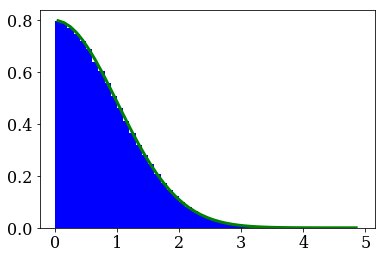

In [10]:
N = 1000000
K = 1.4
h = []

uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

p_g_exp = numpy.exp(-g)
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

uniform2 = numpy.random.random_sample(N)

condition = uniform2 < p_g_gauss/ (K*p_g_exp)

h = numpy.extract(condition,g)

print("Acceptance ratio:", h.size/g.size)

binwidth = 0.1
bins= numpy.arange(0.,5.,binwidth)
pyplot.hist(h,bins, normed = 'true', color = 'blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc, 2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi), lw = 3, color = 'green')


# 6.3

Rappel théorique :

Mouvement Brownien :

Equation stochastique pour le mouvement Brownien

Nous pouvons définir un modèle d'équation qui donne l'évolution de la position d'une molécule de couleur

\begin{equation}
dx = x(t+dt)
\end{equation}

\begin{equation}
ds = x(t)
\end{equation}

En se concentrant sur le mouvement Brownien; regardons ce qu'il se passe si on modélise $ds$ comme cela:

\begin{equation}
ds = \sqrt{2\alpha dt}\cal{ N(0,1)}
\end{equation}

Où $ds$ est un déplacement résultant de la collision avec les molécules d'eau environnantes 
   ,$\alpha$ est le coefficient de diffusion, $\cal{N(0,1)}$ est un nombre aléatoire qui est généré à partir d'une distribution normale centrée en 0 et avec une variance égale à 1 

Dans ce cas, la solution de l'équation de diffusion 
\begin{equation}
\dfrac{\partial\rho}{\partial t} = \alpha \dfrac{\partial^{2}\rho}{\partial x^2}
\end{equation}

est donnée par : 

\begin{equation}
\rho(x,t) = \dfrac{1}{\sqrt{2\pi\sigma_{t}^2}}\exp(\dfrac{-(x-\mu)^2}{2\sigma_{t}^2})
\end{equation}

Avec : 
\begin{equation}
\sigma_{t}^2 = 2\alpha t + \sigma^2
\end{equation}

# 1ère question : Ajouter une contribution au déplacement  dxdx  et analyser le comportement de la marche aléatoire. -Deviner l'équation correspondante régissant l'évolution de la densité dans ce cas -Trouver la solution analytique pour une distribution gaussienne :
\begin{equation}
ds = cdt + \sqrt{2\alpha dt}\cal{ N(0,1)}
\end{equation}

# Où c est une constante 

In [90]:
from matplotlib import pyplot 
import numpy 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

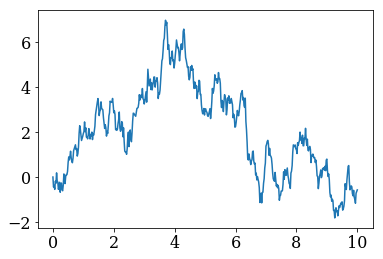

In [91]:
T = 10.0
nt = 500 
dt = T/nt
alpha = 2.0
c = 1/1000


t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]= 0

for i in range(nt):
    x[i+1] = x[i]+ numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1) + c*dt

pyplot.plot(t,x)

L'expression du $dS$ qui comporte le terme de dérive est tout simplement une translation de l'équation de diffusion sans le terme de dérive. On peut deviner que l'expression de la densité est une gaussienne translatée d'une certaine valeur. 
\begin{equation}
\rho(x,t) = \dfrac{1}{\sqrt{2\pi\sigma_{t}^2}}\exp(\dfrac{-(x-\mu)^2}{2\sigma_{t}^2})
\end{equation}


Avec : 
\begin{equation}
\sigma_{t}^2 = 2\alpha t + \sigma^2
\end{equation}

\begin{equation}
\mu = -ct
\end{equation}

On trouve l'expression de la densité avec un $\sigma^2$ qui ne change pas car on translate une gaussienne; seul la moyenne change. $c$ est le taux constant avec lequel les marcheurs dérivent; la distance à laquelle dérive les marcheurs est de $-ct$  


C'est comme cela qu'on trouve l'expression complète de la densité dans le cas où $ds = cdt + \sqrt{2\alpha dt}\cal{ N(0,1)}$

Histogramme de la répartition des positions des molécules de l'échantillon

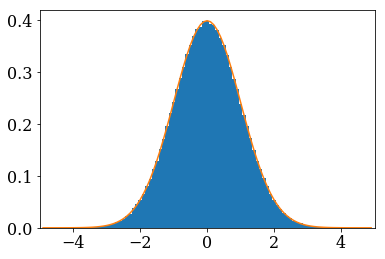

In [92]:
npart = 1000000
sigma = 1.0
x0 = numpy.random.normal(loc=0, scale = sigma, size =npart)
    
binwidth= 0.1
bins = numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True)
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

Donner l'histogramme pour la densité 

In [94]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)+c*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

MemoryError: 

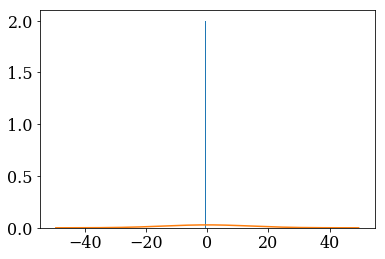

In [95]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*dt)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

# 6.4


# 1ère question : Il faut regarder si l'algorithme "Metropolis" est consistant pour différentes tailles de grille.

On importe les outils dont on a besoin.

In [15]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

On utilise les fonctions données dans le MOOC.

In [16]:
def initial_state(nx,ny):
    
    
    r = numpy.random.randint(0,2,(nx,ny))
    
    
    r[r==0] =-1

    return r

On commence par regarder une grille de taille 15.

In [17]:
nx = 15
ny = 15
sp = initial_state(nx,ny)

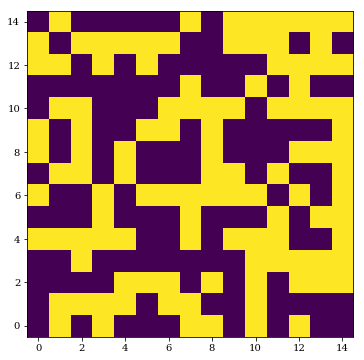

In [18]:
#on fixe alpha et on fait le graphique pour voir si les spins sont biens différents 
alpha = 0.1

sp

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

On va calculer les 2 energies possibles en un point de la grille. Nous avons choisi de prendre le point (9,6). Après on calcul le $\Delta E$ qui nous servira à obtenir la probabilité d'avoir un spin down par rapport à celle d'avoir un spin up.

In [19]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [20]:
x = energy_at_site(sp,alpha,1,9,6)
y = energy_at_site(sp,alpha,-1,9,6)
energy = 0
if x < y :
    energy = x - y
else:
    energy = y -x
print(energy)

0.0


In [21]:
proba = numpy.exp(-energy)
print(proba)

1.0


On implémente l'algorithme "Metropolis" et on va comparer les deux probabilités ainsi obtenue à l'aide d'une petite fonction qui évalue la différence entre les 2 probabilités.

In [22]:
def metropolis_at_site(sp,alpha,ix,iy):
    
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]
        

In [23]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[9,6]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,9,6)
    states[n]=sp[9,6]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
result = ups/downs
print(result)

1.0


In [24]:
def difference(a,b) :
    difference = numpy.abs(a-b)
    return difference

In [25]:
diff = difference(proba,result)
print(diff)

0.0


On répète les calculs pour des grilles de plus en plus grandes pour voir si l'algorithme tient la route.

In [26]:
nx = 20
ny = 20
sp = (initial_state(nx,ny))
x = energy_at_site(sp,alpha,1,9,6)
y = energy_at_site(sp,alpha,-1,9,6)
energy = 0
if x < y :
    energy = x - y
else:
    energy = y -x
print(energy)
proba = numpy.exp(-energy)
print(proba)

-0.4
1.49182469764


In [27]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[9,6]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,9,6)
    states[n]=sp[9,6]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
result = ups/downs
print(result)

0.6719612104999164


In [28]:
diff = difference(proba,result)
print(diff)

0.819863487141


In [29]:
nx = 30
ny = 30
sp = (initial_state(nx,ny))
x = energy_at_site(sp,alpha,1,9,6)
y = energy_at_site(sp,alpha,-1,9,6)
energy = 0
if x < y :
    energy = x - y
else:
    energy = y -x
print(energy)
proba = numpy.exp(-energy)
print(proba)

-0.4
1.49182469764


In [30]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[9,6]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,9,6)
    states[n]=sp[9,6]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
result = ups/downs
print(result)

1.4889862359061155


In [31]:
diff = difference(proba,result)
print(diff)

0.00283846173515


In [32]:
nx = 40
ny = 40
sp = (initial_state(nx,ny))
x = energy_at_site(sp,alpha,1,9,6)
y = energy_at_site(sp,alpha,-1,9,6)
energy = 0
if x < y :
    energy = x - y
else:
    energy = y -x
print(energy)
proba = numpy.exp(-energy)
print(proba)

0.0
1.0


In [33]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[9,6]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,9,6)
    states[n]=sp[9,6]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
result = ups/downs
print(result)

1.0


In [34]:
diff = difference(proba,result)
print(diff)

0.0


In [35]:
nx = 50
ny = 50
sp = (initial_state(nx,ny))
x = energy_at_site(sp,alpha,1,9,6)
y = energy_at_site(sp,alpha,-1,9,6)
energy = 0
if x < y :
    energy = x - y
else:
    energy = y -x
print(energy)
proba = numpy.exp(-energy)
print(proba)

-0.4
1.49182469764


In [36]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[9,6]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,9,6)
    states[n]=sp[9,6]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
result = ups/downs
print(result)

0.669923016548937


In [37]:
diff = difference(proba,result)
print(diff)

0.821901681092


On voit donc que la différence entre le calcul de la probabilité et l'algorithme "Metropolis" est acceptable et que donc l'algorithme tient la route. Même si parfois sans raison apparante, il a l'air de ne pas du tout tenir la route

# 2ème question : En utilisant le modèle de "Ising", il faut trouver la valeur critique d'alpha et regarder si c'est compatible avec la solution exacte du système de Onsager.

On crée notre grille qu'avec des spins up.

In [38]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny])

On utilise la fonction donnée dans le MOOC.

In [39]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [40]:
NMC = 100
alpha = 0.1
states_0_1 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [41]:
NMC = 100
alpha = 0.2
sp = numpy.ones([nx,ny])
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [42]:
NMC = 100
alpha = 0.3
sp = numpy.ones([nx,ny])
states_0_3 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [43]:
NMC = 100
alpha = 0.4
sp = numpy.ones([nx,ny])
states_0_4 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [44]:
NMC = 100
alpha = 0.5
sp = numpy.ones([nx,ny])
states_0_5 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [45]:
NMC = 100
alpha = 0.6
sp = numpy.ones([nx,ny])
states_0_6 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [46]:
NMC = 100
alpha = 0.7
sp = numpy.ones([nx,ny])
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [47]:
NMC = 100
alpha = 0.8
sp = numpy.ones([nx,ny])
states_0_8 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [48]:
NMC = 100
alpha = 0.9
sp = numpy.ones([nx,ny])
states_0_9 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [49]:
NMC = 100
alpha = 1
sp = numpy.ones([nx,ny])
states_1 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

NB : Pour opitmiser le code, on aurait pu faire une boucle "for". Par un soucis de clarté dans le graphique, on a préféré crée indépendamment nos 10 listes states.

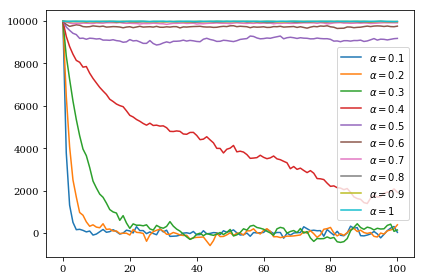

In [50]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')
pyplot.plot(states_1.sum(axis=(1,2)),label=r'$\alpha=1$')

pyplot.legend()
pyplot.tight_layout()

On voit donc que la transition de phase s'effetue entre $\alpha = 0.4$ et $\alpha = 0.5$. Nous allons donc affiner un petit peu le résultat.

In [51]:
NMC = 100
alpha = 0.42
sp = numpy.ones([nx,ny])
states_0_42 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [52]:
NMC = 100
alpha = 0.44
sp = numpy.ones([nx,ny])
states_0_44 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [53]:
NMC = 100
alpha = 0.46
sp = numpy.ones([nx,ny])
states_0_46 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [54]:
NMC = 100
alpha = 0.48
sp = numpy.ones([nx,ny])
states_0_48 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

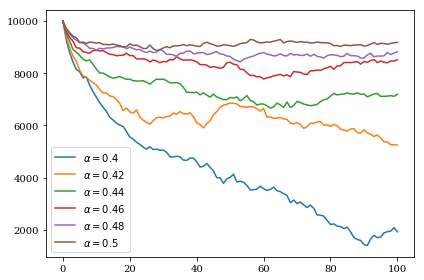

In [55]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_42.sum(axis=(1,2)),label=r'$\alpha=0.42$')
pyplot.plot(states_0_44.sum(axis=(1,2)),label=r'$\alpha=0.44$')
pyplot.plot(states_0_46.sum(axis=(1,2)),label=r'$\alpha=0.46$')
pyplot.plot(states_0_48.sum(axis=(1,2)),label=r'$\alpha=0.48$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')


pyplot.legend()
pyplot.tight_layout()

On voit donc que la transition s'effectue au alentour de $\alpha = 0.44$.

https://en.wikipedia.org/wiki/Square-lattice_Ising_model.

En utilisant le lien ci-dessus, on voit que l'inverse du $\alpha$ critique ($\alpha_c$) doit être égal à :
$\begin{equation}
\alpha_{c} = 2.26918531421
\end{equation}$

En calculant notre $\alpha_c $ trouver graphiquement, on obtient :


In [56]:
alpha_c = 1/0.44
print(alpha_c)

2.272727272727273


On voit donc que notre résultat est cohérent avec la valeur exacte déterminée par Onsager.

# 3ème question : Il faut changer les conditions dans notre grille et refaire l'analyse puis comparer nos 2 résultats.

Comme proposé dans l'énoncé, on va crée une grille avec des spins up sur les bords et des spins aléatoires au milieu.

In [96]:
nx = 100
ny = 100
new_sp = initial_state(nx,ny)

On va maintenant appliqué nos conditions initiales sur notre grille de spins aléatoire.

In [97]:
new_sp[:,0] = 1
new_sp[:,-1] = 1
new_sp[0,:] = 1
new_sp[-1,:] = 1

In [98]:
print(new_sp)

[[ 1  1  1 ...,  1  1  1]
 [ 1 -1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 ..., 
 [ 1  1  1 ..., -1 -1  1]
 [ 1  1 -1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]


On répète la même procédure que précédemment pour trouver le $\alpha_c$ de notre nouveau système.

In [99]:
NMC = 100
alpha = 0.1
copy1 = new_sp
states_new_0_1 = ising_model_metropolis(copy1, NMC, nx, ny, alpha)

In [61]:
NMC = 100
alpha = 0.2
copy2 = new_sp
states_new_0_2 = ising_model_metropolis(copy2, NMC, nx, ny, alpha)

In [62]:
NMC = 100
alpha = 0.3
copy3 = new_sp
states_new_0_3 = ising_model_metropolis(copy3, NMC, nx, ny, alpha)

In [63]:
NMC = 100
alpha = 0.4
copy4 = new_sp
states_new_0_4 = ising_model_metropolis(copy4, NMC, nx, ny, alpha)

In [64]:
NMC = 100
alpha = 0.5
copy5 = new_sp
states_new_0_5 = ising_model_metropolis(copy5, NMC, nx, ny, alpha)

In [65]:
NMC = 100
alpha = 0.6
copy6 = new_sp
states_new_0_6 = ising_model_metropolis(copy6, NMC, nx, ny, alpha)

In [66]:
NMC = 100
alpha = 0.7
copy7 = new_sp
states_new_0_7 = ising_model_metropolis(copy7, NMC, nx, ny, alpha)

In [67]:
NMC = 100
alpha = 0.8
copy8 = new_sp
states_new_0_8 = ising_model_metropolis(copy8, NMC, nx, ny, alpha)

In [68]:
NMC = 100
alpha = 0.9
copy9 = new_sp
states_new_0_9 = ising_model_metropolis(copy9, NMC, nx, ny, alpha)

In [69]:
NMC = 100
alpha = 1
copy10 = new_sp
states_new_1 = ising_model_metropolis(copy10, NMC, nx, ny, alpha)

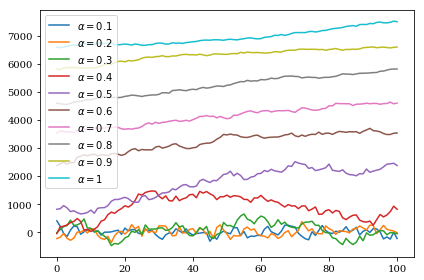

In [70]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_new_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_new_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_new_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_new_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_new_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_new_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_new_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_new_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_new_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')
pyplot.plot(states_new_1.sum(axis=(1,2)),label=r'$\alpha=1$')

pyplot.legend()
pyplot.tight_layout()

Comme on peut le voir, c'est beaucoup moins évident de trouver $\alpha_c$ dans ce système.

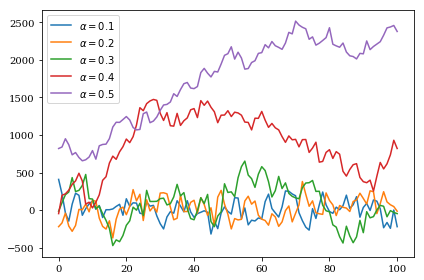

In [71]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_new_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_new_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_new_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_new_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_new_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')

pyplot.legend()
pyplot.tight_layout()

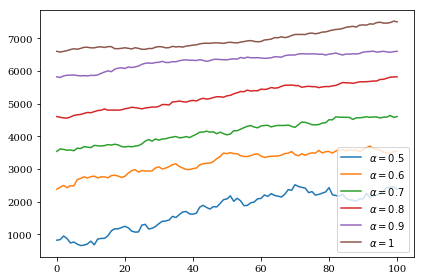

In [72]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_new_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_new_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_new_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_new_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_new_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')
pyplot.plot(states_new_1.sum(axis=(1,2)),label=r'$\alpha=1$')

pyplot.legend()
pyplot.tight_layout()

Grâce à ces 2 derniers graphiques, on voit que de $\alpha = 0.5$ à $\alpha = 1$, le comportement est "similaire". Idem pour $\alpha = 0.1$ à $\alpha = 0.4$. 

Donc notre $\alpha_c$ se trouve également entre $\alpha = 0.4$ et $\alpha = 0.5$. Nous allons à nouveau affiner le résultat. 

In [73]:
NMC = 100
alpha = 0.42
copy = new_sp
states_new_0_42 = ising_model_metropolis(copy, NMC, nx, ny, alpha)

In [74]:
NMC = 100
alpha = 0.44
copy = new_sp
states_new_0_44 = ising_model_metropolis(copy, NMC, nx, ny, alpha)

In [75]:
NMC = 100
alpha = 0.46
copy = new_sp
states_new_0_46 = ising_model_metropolis(copy, NMC, nx, ny, alpha)

In [76]:
NMC = 100
alpha = 0.48
copy = new_sp
states_new_0_48 = ising_model_metropolis(copy, NMC, nx, ny, alpha)

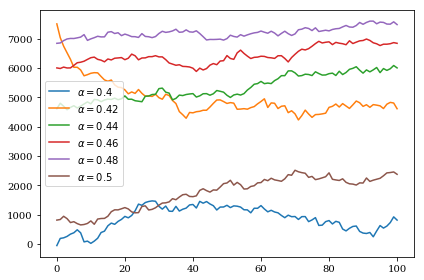

In [77]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()

pyplot.plot(states_new_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_new_0_42.sum(axis=(1,2)),label=r'$\alpha=0.42$')
pyplot.plot(states_new_0_44.sum(axis=(1,2)),label=r'$\alpha=0.44$')
pyplot.plot(states_new_0_46.sum(axis=(1,2)),label=r'$\alpha=0.46$')
pyplot.plot(states_new_0_48.sum(axis=(1,2)),label=r'$\alpha=0.48$')
pyplot.plot(states_new_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')

pyplot.legend()
pyplot.tight_layout()

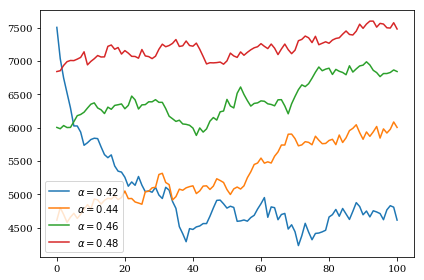

In [78]:
fig = pyplot.figure(figsize=(6,9))

pyplot.figure()


pyplot.plot(states_new_0_42.sum(axis=(1,2)),label=r'$\alpha=0.42$')
pyplot.plot(states_new_0_44.sum(axis=(1,2)),label=r'$\alpha=0.44$')
pyplot.plot(states_new_0_46.sum(axis=(1,2)),label=r'$\alpha=0.46$')
pyplot.plot(states_new_0_48.sum(axis=(1,2)),label=r'$\alpha=0.48$')


pyplot.legend()
pyplot.tight_layout()

Cette fois-ci, notre $\alpha_c$ semble être aux alentours de $\alpha = 0.46$

In [79]:
alpha_c = 1/0.46
print(alpha_c)

2.1739130434782608


Une fois de plus, la valeur déterminée graphiquement concorde avec la solution exacte d'Onsager.

En conclusion, on voit que le comportement est plus compliqué à étudié quand les spins sont aléatoires. Une fois que $\T_c$ est atteint, tout les spins vont changer d'orientation car le matériau ne produit plus de champ magnétique. Si les spins sont tous dans le même état initial, ils vont avoir tendance à se réorienter tous dans le même sens à cause de l'interaction entre voisins proches. Si les spins sont aléatoires dans l'état initial, ils se réorienteront sans direction priviligiée à nouveau à cause de l'interaction entre voisins proches.

De plus, on a vérifié graphiquement la relation exacte d'Onsager pour nos 2 systèmes. On a donc vérifié le modèle.

In [80]:
print(new_sp)

[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 ..., 
 [-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ...,  1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]]
